In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Use the numerical variables from our dataset this week

In [3]:
data_Num = pd.read_csv("numerical.csv")
data_Num = data_Num.drop(["Unnamed: 0","effective_to_date"],axis =1)

In [4]:
data_Num.shape

(9134, 8)

customer_lifetime_value


C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


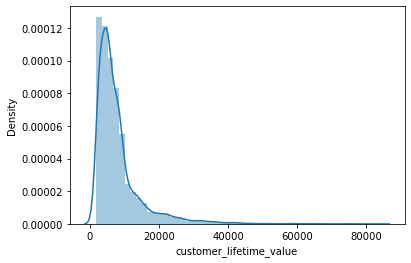

income


C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


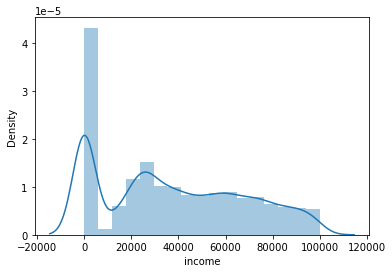

monthly_premium_auto


C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


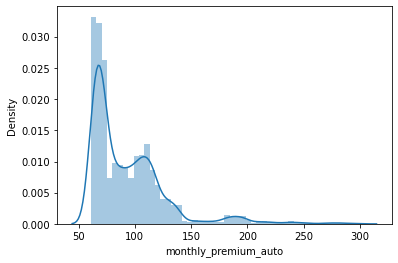

months_since_last_claim


C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


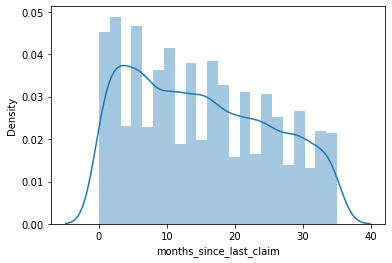

months_since_policy_inception


C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


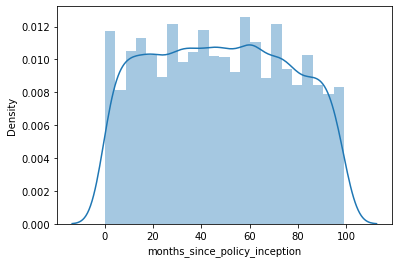

number_of_open_complaints


C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


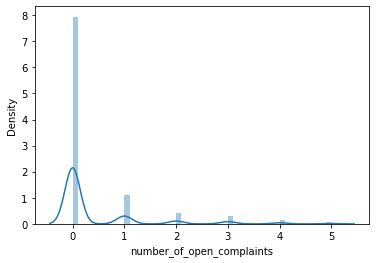

number_of_policies


C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


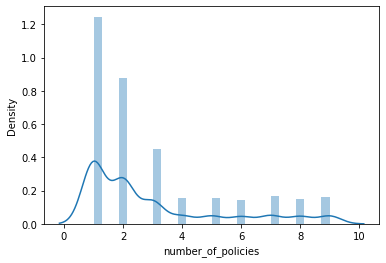

total_claim_amount


C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


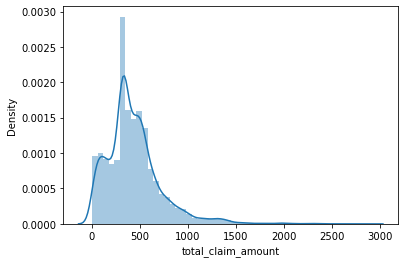

In [5]:
# Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
for i in data_Num.columns:
    print(i)
    sns.distplot(data_Num[i])
    plt.show()

In [ ]:
customer_liftime_Value --- look like normal distribution with right skew
income ------ neither exponetial / normal
monthly premium auto ---- neither expontial /normal
months_sicnce_last_Claim ----neither  exponetial/normal
months_since_policy_inception ---- normal but high variance (flat top)
number_of_open_complaints ---- exponetial
number of policies ----- exponetial
total claim amount ---- could be exponetial if we overlook the peak between 0 and 500


In [7]:
df = np.log(data_Num[['number_of_open_complaints','number_of_policies','total_claim_amount']])

<ipython-input-7-bd185071b005>:1: RuntimeWarning: divide by zero encountered in log
  df = np.log(data_Num[['number_of_open_complaints','number_of_policies','total_claim_amount']])


In [8]:
df

,number_of_open_complaints,number_of_policies,total_claim_amount
0,-inf,0.000000,5.952753
1,-inf,2.079442,7.031268
2,-inf,0.693147,6.339428
3,-inf,1.945910,6.272653
4,-inf,0.000000,4.928202
...,...,...,...
9129,-inf,0.693147,5.289452
9130,-inf,0.000000,5.938064
9131,1.098612,0.693147,6.673026
9132,-inf,1.098612,6.538429


C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

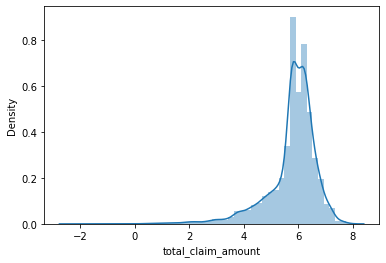

In [9]:
# num of complains we have zero values in the data .. so that log transformation is giving inf
# we will plot for num of policies and total claim amount
sns.distplot(df["total_claim_amount"])

In [ ]:
# from the above graph i can coclude that log transformation has made the data 
#left screwed and if we do outlier treatment we may get normal distribution

C:\Users\Denish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_policies', ylabel='Density'>

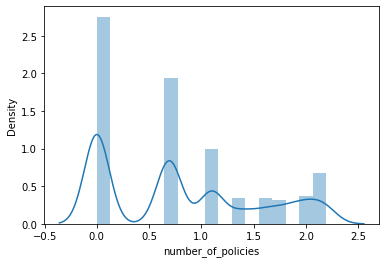

In [10]:
sns.distplot(df["number_of_policies"])

In [ ]:
# here log transformation has changed the scale but 